<Figure size 400x450 with 0 Axes>

<Figure size 400x450 with 0 Axes>

<Figure size 400x450 with 0 Axes>

<Figure size 400x450 with 0 Axes>

<Figure size 400x450 with 0 Axes>

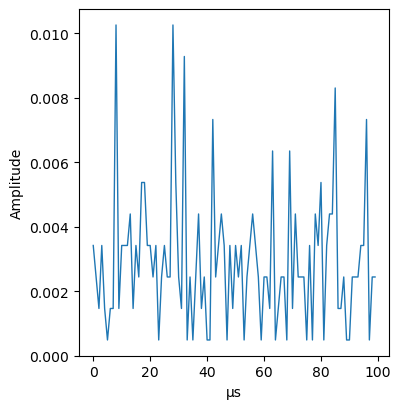

In [1]:
from tkinter import*
import sqlite3
import tkinter.messagebox
import os

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)




class product:
    def __init__(self, root):
        
       
        self.root=root
        self.root.title('Ultra sound Imaging ')
        self.root.geometry('1475x690')
        self.root.config(bg='yellow')
        mainFrame=Frame(self.root,bg='red')
        mainFrame.grid()
        
        path='C://Users//kande//FDTD_GOLD//TwoNano//my_data'           
        dir_list=os.listdir(path)
        timestamps= np.loadtxt('sensor_reading.txt') # This open the text file and store the values of time, temperature and humidity
        def show_data_list():
            dataList.delete(0, END)
            for i in fileList.curselection():
                
                #data=pd.read_excel(path+'//'+fileList.get(i))
                data=pd.read_fwf(path+'//'+fileList.get(i))
            
                for row in data['Data'] :
                    dataList.insert(END, row, str(' '))

        def show_file_list():
            fileList.delete(0, END)
            for row in dir_list :
                fileList.insert(END, row, str(' '))
        
        def selected_file():
            for i in fileList.curselection():
                print(fileList.get(i))
            
            
        
        def grap_H():
            
            
            #converting the unix time to real date format
            #dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps] 
            fig = plt.figure(figsize=(4,4.5))
            for i in fileList.curselection():
                
                #data=pd.read_excel(path+'//'+fileList.get(i))
                data=pd.read_fwf(path+'//'+fileList.get(i))
                
                
            
                
                plt.plot(data['Data'][:100],linewidth=1)
                plt.xlabel(u"\u03bcs")
                plt.ylabel('Amplitude')

                canvas = FigureCanvasTkAgg(fig,
                                   master =graphBody )  
                canvas.draw()

                canvas.get_tk_widget().grid(row=0,column=0)
            

        
        headFrame=Frame(mainFrame, bd=1,padx=10,pady=10,bg='blue',relief= RIDGE)
        headFrame.pack(side=TOP)
        Itite=Label(headFrame,font=('arial',30,'bold'),text='ULTRASOUND IMAGIMG ',bg='white')
        Itite.grid()
        operatinFrame=Frame(mainFrame,bd=10,width=500,height=600,padx=20,pady=20,bg='white',relief=RIDGE)
        operatinFrame.pack(side=LEFT)
        bodyFrame=Frame(mainFrame,bd=2,width=900,height=600,padx=30,pady=20,bg='white',relief=RIDGE)
        bodyFrame.pack(side=RIGHT)
        
        leftBody=LabelFrame(bodyFrame,bd=0,padx=10,pady=10,bg='yellow',width=500,
                                height=500,font=('arial',20,'bold'),text='Graph')
        rightBody=LabelFrame(bodyFrame,bd=0,padx=10,pady=10,bg='yellow',width=380,
                                height=500,font=('arial',20,'bold'))
        
        leftBody.pack(side=LEFT)
        rightBody.pack(side=RIGHT)
        
        graphBody =Frame(leftBody, bd=1, padx=10, pady=10, bg='white', width=500,
                              height=450,relief=RIDGE )
        graphBody.pack()
        DataBody =LabelFrame(rightBody, bd=1, padx=10, pady=10, bg='white', width=100,
                              height=450,relief=RIDGE,text='Data' )
        DataBody.pack(side=LEFT)
        
        fileBody=LabelFrame(rightBody, bd=1,padx=10,pady=10,bg='white', width=10, height=450,relief=RIDGE, text='Files')
        fileBody.pack(side=RIGHT)
        
        scroll= Scrollbar(DataBody)
        scroll.grid(row=0,column=1,sticky='ns')
        dataList=Listbox(DataBody,width=40,height=25,font=('arial',10,'bold'),yscrollcommand=scroll.set)
        dataList.bind('<<ListboxSelect>>')
        dataList.grid(row=0,column=0,padx=8)
        scroll.config(command=dataList.yview)
        
        scroll2= Scrollbar(fileBody)
        scroll2.grid(row=0,column=1,sticky='ns')
        fileList=Listbox(fileBody,width=40,height=25,font=('arial',10,'bold'),yscrollcommand=scroll2.set)
        fileList.bind('<<ListboxSelect>>')
        fileList.grid(row=0,column=0,padx=8)
        scroll2.config(command=fileList.yview)
        
        
        self.ButtonSave=Button(operatinFrame,text='Show graph',font=('arial',20,'bold'),height=1,width=10,bd=4,command=grap_H)
        self.ButtonSave.pack()

        self.ButtonShow = Button(operatinFrame, text='Show Data', font=('arial', 20, 'bold'), height=1, width=10, bd=4,command=show_data_list)
        self.ButtonShow.pack()

        self.ButtonSearch = Button(operatinFrame, text='Search', font=('arial', 20, 'bold'), height=1, width=10, bd=4,command=selected_file)
        self.ButtonSearch.pack()

        self.ButtonUpdate = Button(operatinFrame, text='Files', font=('arial', 20, 'bold'), height=1, width=10, bd=4,command=show_file_list)
        self.ButtonUpdate.pack()
        
        
        
       
        
if __name__ == "__main__":
    root = Tk()
    application = product(root)
    root.mainloop()